Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/drive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/drive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/CONTENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/CONTENT/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
from tensorflow.keras.preprocessing import image_dataset_from_directory
##todo
train_ds =  image_dataset_from_directory(
    '/content/drive/MyDrive/CONTENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
) 

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
##todo
val_ds = image_dataset_from_directory(
     '/content/drive/MyDrive/CONTENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
)


Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

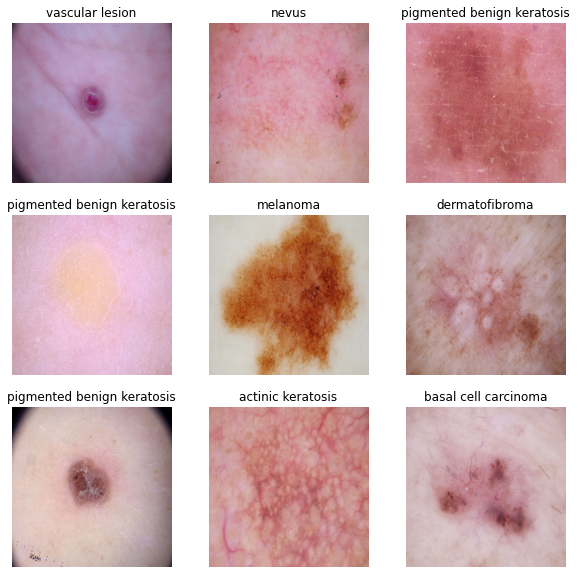

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images,labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis("off")




The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

Importing libraries for model building

In [4]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Conv2D, MaxPool2D, Activation,Flatten,Dense, Dropout
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

In [ ]:
### Your code goes here
model=Sequential()
#1 st Convolution layer
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))
model.add(Conv2D(32, kernel_size=(3, 3),strides=(1, 1), padding="same",activation="relu", input_shape=(180,180,3)))
model.add(Conv2D(32, kernel_size=(3, 3),strides=(1, 1), padding="same",activation="relu")) 
model.add(MaxPool2D(pool_size=(2, 2)))
# 2 nd Convolution layer
model.add(Conv2D(64, kernel_size=(3, 3),strides=(1, 1), padding="same",activation="relu")) 
model.add(MaxPool2D(pool_size=(2, 2)))

# 3rd Convolution layer
model.add(Conv2D(128, kernel_size=(3, 3),strides=(1, 1), padding="same",activation="relu")) 
model.add(MaxPool2D(pool_size=(2, 2)))
# Dense Layer
model.add(layers.Flatten())
# Dense Layer
model.add(Dense(512, activation='relu'))
# Dense Layer
model.add(Dense(128, activation='relu'))
#Dense Layer with softmax activation.
model.add(Dense(len(class_names), activation='softmax'))



### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [5]:
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 module_wrapper (ModuleWrapp  (None, 180, 180, 32)     896       
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 180, 180, 32)     9248      
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 90, 90, 32)       0         
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 90, 90, 64)       18496     
 pper)                                                  

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 366s 2s/step - loss: 1.9769 - accuracy: 0.2550 - val_loss: 1.7507 - val_accuracy: 0.3960
Epoch 2/20
56/56 [==============================] - 4s 73ms/step - loss: 1.5636 - accuracy: 0.4464 - val_loss: 1.4574 - val_accuracy: 0.5101
Epoch 3/20
56/56 [==============================] - 4s 74ms/step - loss: 1.4545 - accuracy: 0.4933 - val_loss: 1.4539 - val_accuracy: 0.5145
Epoch 4/20
56/56 [==============================] - 4s 75ms/step - loss: 1.3108 - accuracy: 0.5446 - val_loss: 1.4665 - val_accuracy: 0.4877
Epoch 5/20
56/56 [==============================] - 4s 73ms/step - loss: 1.2579 - accuracy: 0.5558 - val_loss: 1.4284 - val_accuracy: 0.5145
Epoch 6/20
56/56 [==============================] - 4s 73ms/step - loss: 1.1727 - accuracy: 0.5837 - val_loss: 1.3779 - val_accuracy: 0.5459
Epoch 7/20
56/56 [==============================] - 4s 77ms/step - loss: 1.1393 - accuracy: 0.5926 - val_loss: 1.4509 - val_accuracy: 0.5414
Epoch 8/20
56

### Visualizing training results

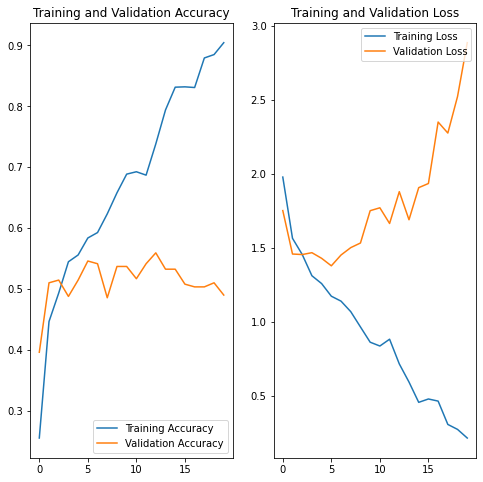

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### From the above graphs we can see that model is overfitting.it's accuracy on unseen data is very less. As epoch increases, the difference in accuracies of training and validation is increasing. To prevent model from memorizing, we will augment the images in training data set.

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = tf.keras.Sequential([
  #Random flip of each image.
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    
  #Random rotation each image.
  layers.experimental.preprocessing.RandomRotation(0.2),
    
  #Random zoom of each image during training.
  layers.experimental.preprocessing.RandomZoom(0.2),
    
  #Random translation of each image during training.
  layers.experimental.preprocessing.RandomTranslation(0.1, 0.1)    
])

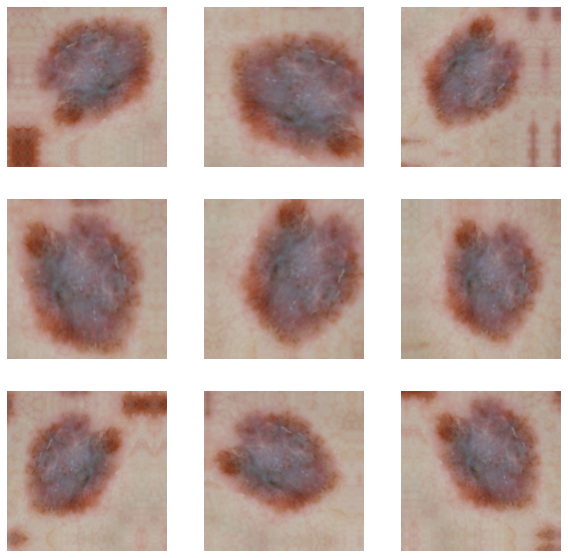

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):   
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")   

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model2=Sequential()

model2.add(data_augmentation)
#1 st Convolution layer
model2.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))
model2.add(Conv2D(32, kernel_size=(3, 3),strides=(1, 1), padding="same",activation="relu", input_shape=(180,180,3)))
model2.add(Conv2D(32, kernel_size=(3, 3),strides=(1, 1), padding="same",activation="relu")) 
model2.add(MaxPool2D(pool_size=(2, 2)))
# drop out layer
model2.add(layers.Dropout(0.25))
# 2nd  Convolution layer
model2.add(Conv2D(64, kernel_size=(3, 3),strides=(1, 1), padding="same",activation="relu")) 
model2.add(MaxPool2D(pool_size=(2, 2)))
# drop out layer
model2.add(layers.Dropout(0.25))
# 3rd Convolution layer
model2.add(Conv2D(128, kernel_size=(3, 3),strides=(1, 1), padding="same",activation="relu")) 
model2.add(MaxPool2D(pool_size=(2, 2)))

model2.add(layers.Flatten())
# Dense Layer
model2.add(Dense(512, activation='relu'))
# Dense Layer
model2.add(Dense(128, activation='relu'))
# drop out layer
model2.add(layers.Dropout(0.50))
# Dense Layer with softmax
model2.add(Dense(len(class_names), activation='softmax'))




### Compiling the model

In [ ]:
## Your code goes here

model2.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
#history = ## your training code
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


56/56 [==============================] - 17s 210ms/step - loss: 2.2577 - accuracy: 0.1669 - val_loss: 2.0422 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 12s 215ms/step - loss: 2.0479 - accuracy: 0.1791 - val_loss: 2.0456 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 10s 187ms/step - loss: 2.0426 - accuracy: 0.1763 - val_loss: 2.0176 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 10s 187ms/step - loss: 2.0408 - accuracy: 0.1875 - val_loss: 2.0314 - val_accuracy: 0.1924
Epoch 5/20
56/56 [==============================] - 10s 184ms/step - loss: 2.0373 - accuracy: 0.1858 - val_loss: 2.0258 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 10s 187ms/step - loss: 2.0299 - accuracy: 0.1987 - val_loss: 2.0332 - val_accuracy: 0.2081
Epoch 7/20
56/56 [==============================] - 10s 185ms/step - loss: 2.0131 - accuracy: 0.2143 - val_loss: 1.9742 - val_accuracy: 0.2774
Epoch 8/20

### Visualizing the results

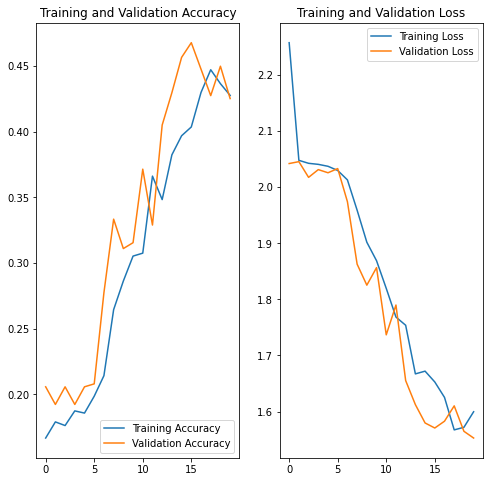

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### After using augmentation layer, Overfitting is reduced to significant extent but the accuracy of the model is low. we need the model with good performance for classifying images. 

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
# creating an empty dataframe
train1=pd.DataFrame()
# creating a column in dataframe that consists the names of every image path
train1['names']= pd.Series(list(data_dir_train.glob('*/*.jpg')))
# creating a label column in dataframe by splitting the path and extracting a label from path
train1['labels']=train1.names.map(lambda img_name: str(img_name).split("/")[-2])
train1.head()
# Dataframe with labels and count of labels
class_count=pd.DataFrame(train1.labels.value_counts())
class_count



,labels
pigmented benign keratosis,462
melanoma,438
basal cell carcinoma,376
nevus,357
squamous cell carcinoma,181
vascular lesion,139
actinic keratosis,114
dermatofibroma,95
seborrheic keratosis,77


**Visualization of labels count**

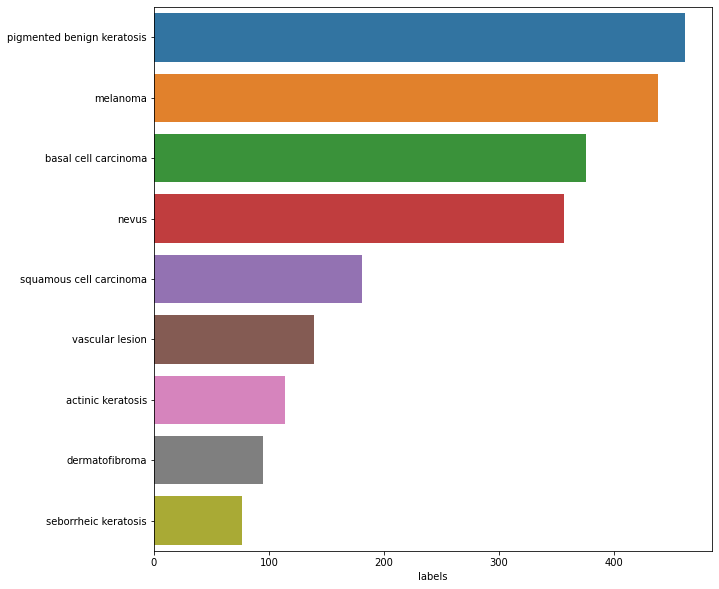

In [ ]:
# A bar plot showing count of each label
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.barplot(x=class_count.labels, y=class_count.index, data=class_count,
            label="Count")

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - seborrheic keratosis has least number of samples with 77.
#### - Which classes dominate the data in terms proportionate number of samples?
#### - pigmented benign keratosis , melanoma, basal cell carcinoma, and nevus  classes  have more than 350 samples each and dominates the data in terms proportionate number of samples


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset=pathlib.Path("/content/drive/MyDrive/CONTENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
import Augmentor
for i in class_names :
    print(i)
    p = Augmentor.Pipeline(os.path.join(path_to_training_dataset,i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

actinic keratosis
Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CONTENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2CE8319390>: 100%|██████████| 500/500 [00:18<00:00, 26.83 Samples/s]


basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/CONTENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2CE867A150>: 100%|██████████| 500/500 [00:18<00:00, 26.60 Samples/s]


dermatofibroma
Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/CONTENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F2CE9439AD0>: 100%|██████████| 500/500 [00:19<00:00, 25.24 Samples/s]


melanoma
Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/CONTENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=964x640 at 0x7F2CE9EB5A50>: 100%|██████████| 500/500 [01:31<00:00,  5.44 Samples/s]


nevus
Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/CONTENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=962x722 at 0x7F2D0ED4B390>: 100%|██████████| 500/500 [01:28<00:00,  5.62 Samples/s]


pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/CONTENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2D26164F50>: 100%|██████████| 500/500 [00:18<00:00, 27.46 Samples/s]


seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/CONTENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F2D266E1B90>: 100%|██████████| 500/500 [00:41<00:00, 11.97 Samples/s]


squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/CONTENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2D0ECFED50>: 100%|██████████| 500/500 [00:20<00:00, 24.45 Samples/s]


vascular lesion
Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/CONTENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2D0EDC9F50>: 100%|██████████| 500/500 [00:18<00:00, 26.94 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#lesion_list_new

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)

In [ ]:
#new_df['Label'].value_counts()
df2['Label'].value_counts()

squamous cell carcinoma       500
melanoma                      500
dermatofibroma                500
basal cell carcinoma          500
vascular lesion               500
actinic keratosis             500
pigmented benign keratosis    500
nevus                         500
seborrheic keratosis          500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [7]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [8]:
data_dir_train= '/content/drive/MyDrive/CONTENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
#"path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  shuffle=True,
  seed=123,
  validation_split = 0.2,
  subset ='training',                  ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  shuffle=True,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',               ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [10]:
## your code goes here
model3=Sequential()


#1 st Convolution layer
model3.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))
model3.add(Conv2D(32, kernel_size=(3, 3),strides=(1, 1), padding="same",activation="relu", input_shape=(180,180,3)))
#model3.add(Conv2D(32, kernel_size=(3, 3),strides=(1, 1), padding="same",activation="relu")) 
model3.add(MaxPool2D(pool_size=(2, 2)))



# Drop out Layer
model3.add(layers.Dropout(0.3))

#model3.add(BatchNormalization())

# 2 nd Convolution layer
model3.add(Conv2D(64, kernel_size=(3, 3),strides=(1, 1), padding="same",activation="relu")) 
model3.add(MaxPool2D(pool_size=(2, 2)))



# Drop out Layer
model3.add(layers.Dropout(0.3))

#model3.add(BatchNormalization())

# 3rd Convolution layer
model3.add(Conv2D(128, kernel_size=(3, 3),strides=(1, 1), padding="same",activation="relu")) 
model3.add(MaxPool2D(pool_size=(2, 2)))


model3.add(layers.Dropout(0.3))
model3.add(BatchNormalization())

model3.add(layers.Flatten())

# Dense Layer
model3.add(Dense(512, activation='relu'))

model3.add(layers.Dropout(0.3))

model3.add(BatchNormalization())
# Dense Layer
model3.add(Dense(128, activation='relu'))


# Drop out Layer
model3.add(layers.Dropout(0.50))
model3.add(BatchNormalization())

# Dense Layer with Softmax
model3.add(Dense(9, activation='softmax'))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [13]:
## your code goes here
optimizer=Adam(learning_rate=0.0006)
model3.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [14]:
epochs =50
## Your code goes here, use 50 epochs.
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
 # your model fit code

Epoch 1/50
169/169 [==============================] - 1808s 11s/step - loss: 2.0336 - accuracy: 0.2902 - val_loss: 3.5668 - val_accuracy: 0.1514
Epoch 2/50
169/169 [==============================] - 33s 188ms/step - loss: 1.6588 - accuracy: 0.3858 - val_loss: 4.6070 - val_accuracy: 0.2621
Epoch 3/50
169/169 [==============================] - 36s 206ms/step - loss: 1.5159 - accuracy: 0.4280 - val_loss: 5.3542 - val_accuracy: 0.1752
Epoch 4/50
169/169 [==============================] - 33s 186ms/step - loss: 1.4282 - accuracy: 0.4581 - val_loss: 4.1470 - val_accuracy: 0.2242
Epoch 5/50
169/169 [==============================] - 32s 186ms/step - loss: 1.3555 - accuracy: 0.4911 - val_loss: 5.5853 - val_accuracy: 0.2420
Epoch 6/50
169/169 [==============================] - 32s 185ms/step - loss: 1.3019 - accuracy: 0.5093 - val_loss: 5.2998 - val_accuracy: 0.2702
Epoch 7/50
169/169 [==============================] - 32s 186ms/step - loss: 1.2278 - accuracy: 0.5462 - val_loss: 4.2129 - val_ac

#### **Todo:**  Visualize the model results

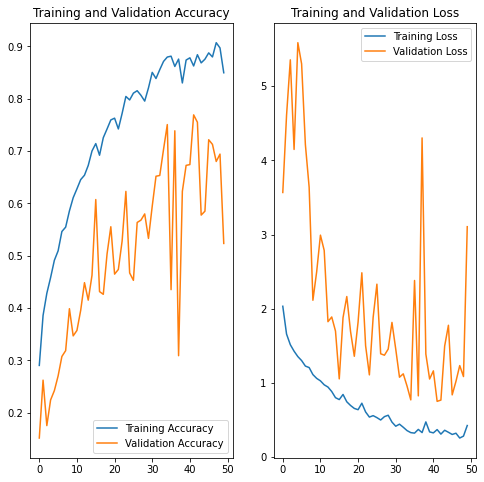

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Class rebalance improved overfitting a little bit and improved training accuracy. Still,overfitting exists, there are fluctuations in validation accuracy. validation accuracy needs to be improved